In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sns.set(style="whitegrid")

# Load pose_data.csv
data_df = pd.read_csv("pose_data.csv")

# pose_data.csv preview
print(data_df.head())

   frame  processing_time_ms  detected_keypoints  \
0      1           96.190453                  18   
1      2           85.623980                  17   
2      3           75.834513                  14   
3      4           77.630997                  14   
4      5           87.119102                  19   

                                   confidence_scores  
0  [0.6696264147758484, 0.6338731646537781, 0.420...  
1  [0.7063313722610474, 0.6726978421211243, 0.538...  
2  [0.43175479769706726, 0.5571764707565308, 0.21...  
3  [0.429458886384964, 0.5729811191558838, 0.4291...  
4  [0.7678295373916626, 0.6774158477783203, 0.694...  


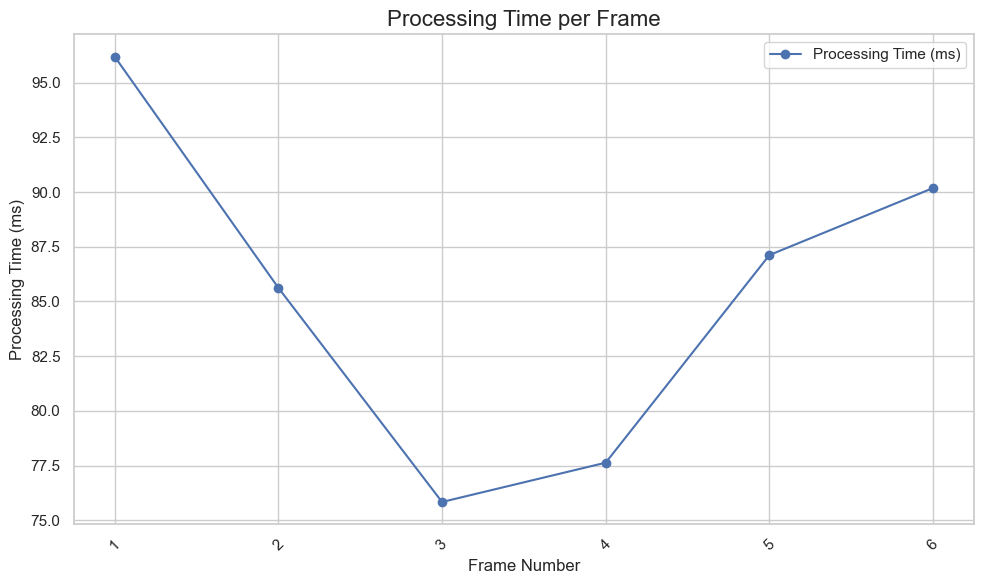

In [16]:
# Plotting the processing time per frame (ms)
plt.figure(figsize=(10, 6))
plt.plot(data_df['frame'], data_df['processing_time_ms'], marker='o', linestyle='-', color='b', label='Processing Time (ms)')
plt.title("Processing Time per Frame", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Processing Time (ms)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

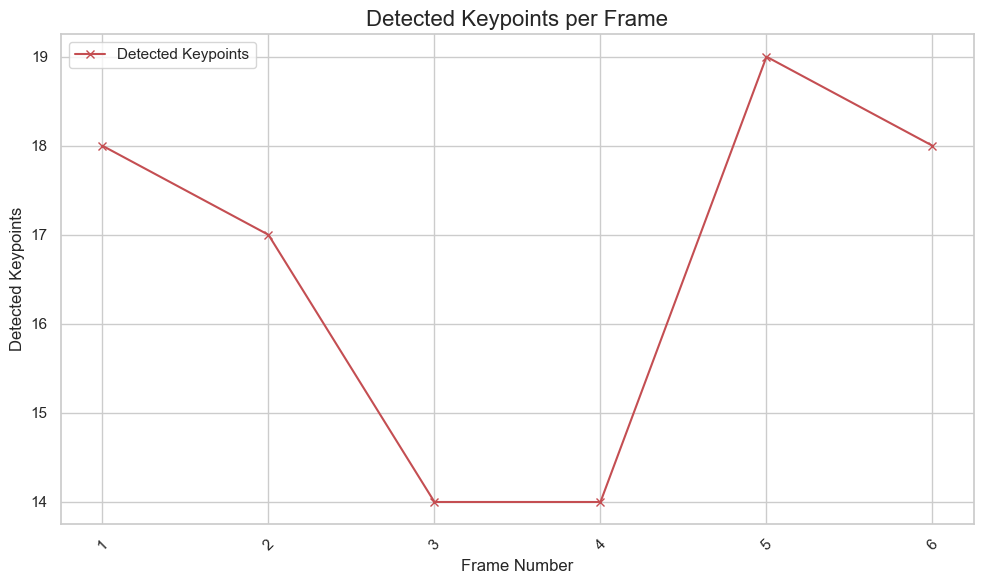

In [17]:
# Plotting the number of detected keypoints per frame
plt.figure(figsize=(10, 6))
plt.plot(data_df['frame'], data_df['detected_keypoints'], marker='x', linestyle='-', color='r', label='Detected Keypoints')
plt.title("Detected Keypoints per Frame", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Detected Keypoints", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
# Plotting confidence scores for each frame (multiple series in a stacked bar chart)
# Convert confidence scores to numeric and normalize by the number of keypoints
data_df['confidence_scores_count'] = data_df['confidence_scores'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
confidence_data = data_df['confidence_scores'].apply(lambda x: eval(x) if pd.notnull(x) else [])
all_confidences = [item for sublist in confidence_data for item in sublist]

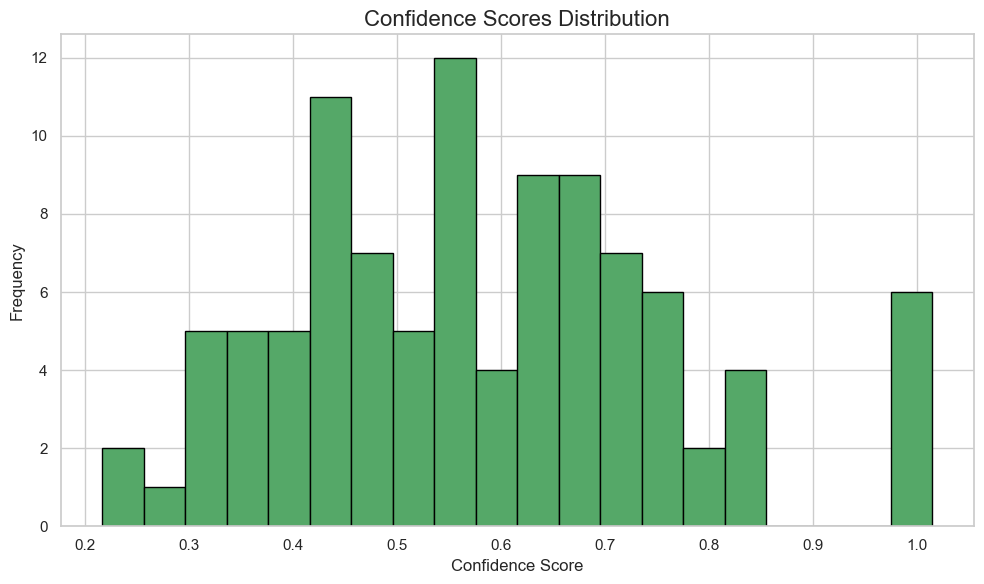

In [19]:
# Create a histogram for confidence scores distribution across all frames
plt.figure(figsize=(10, 6))
plt.hist(all_confidences, bins=20, color='g', edgecolor='black')
plt.title("Confidence Scores Distribution", fontsize=16)
plt.xlabel("Confidence Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

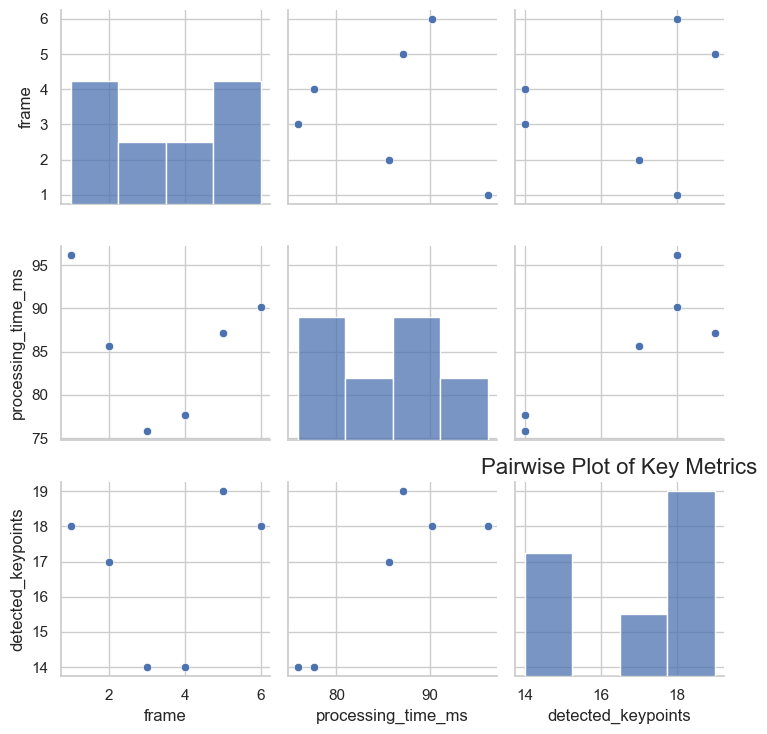

In [ ]:
sns.pairplot(data_df[['frame', 'processing_time_ms', 'detected_keypoints']])
plt.title("Pairwise Plot of Key Metrics", fontsize=16)
plt.tight_layout()
plt.show()